In [ ]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
digits = load_digits()
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score

In [48]:
# Print to show there are 1797 images (8 by 8 images for a dimensionality of 64)
print("Image Data Shape" , digits.data.shape)

# Print to show there are 1797 labels (integers from 0-9)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


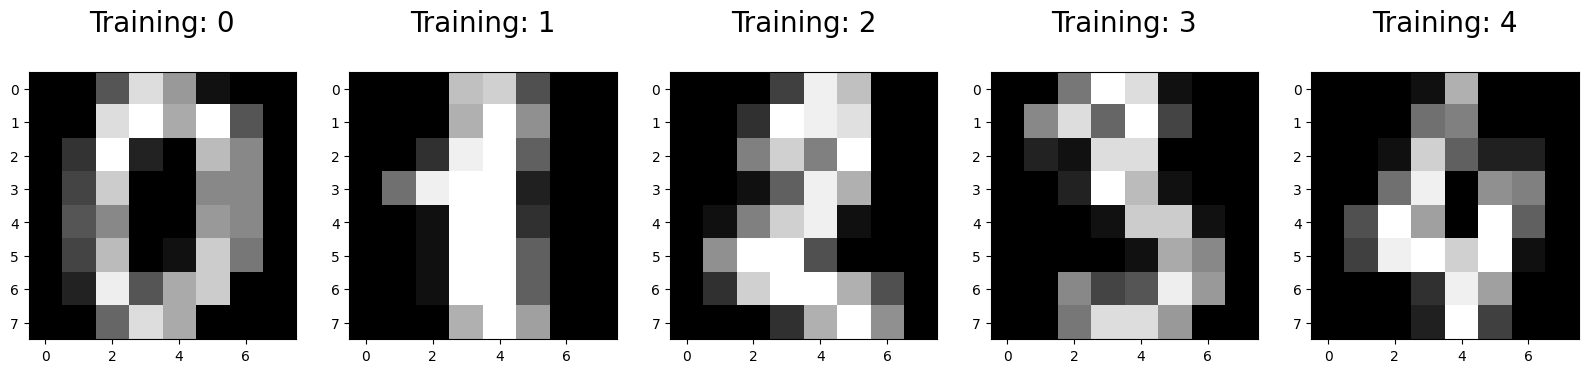

In [49]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

### Split data into train and test sets

In [ ]:
clf = RandomForestClassifier()

X = digits.data
y = digits.target 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
random_state = 42 )
clf.fit(X_train, y_train)

preds = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test,preds))

Accuracy: 0.9722222222222222


The training set is used to train the model.
The test set is used to evaluate how well the model performs on unseen data.

### Create classification model and tune max_depth parameter

In [51]:
best_accuracy = 0
best_depth = 0

for depth in [1, 2, 3, 4, 5, 6, 7]: 
    clf = RandomForestClassifier(max_depth=depth, random_state=42)
    clf.fit(X_train, y_train)
    preds = clf.predict(X_test)
    acc = accuracy_score(y_test, preds)
    print(f"max_depth={depth} → Accuracy={acc:.4f}")
    
    if acc > best_accuracy:
        best_accuracy = acc
        best_depth = depth

print(f"\nBest max_depth: {best_depth} with accuracy: {best_accuracy:.4f}")

max_depth=1 → Accuracy=0.6583
max_depth=2 → Accuracy=0.8278
max_depth=3 → Accuracy=0.8972
max_depth=4 → Accuracy=0.9194
max_depth=5 → Accuracy=0.9444
max_depth=6 → Accuracy=0.9639
max_depth=7 → Accuracy=0.9722

Best max_depth: 7 with accuracy: 0.9722


I chose to tune the max_depth parameter because it controls how complex each tree can be.
After tuning max depth values, I chose the one that gave the highest accuracy on the test set which is 7.

### Confusion matrix

In [52]:
classes = list(load_digits().target_names)
conf_mat = confusion_matrix(y_test, preds)
cm_df = pd.DataFrame(conf_mat, columns=classes, index=classes)
cm_df

0   1   2   3   4   5   6   7   8   9
0  32   0   0   0   1   0   0   0   0   0
1   0  28   0   0   0   0   0   0   0   0
2   0   0  33   0   0   0   0   0   0   0
3   0   0   0  33   0   0   0   0   1   0
4   0   0   0   0  45   0   0   1   0   0
5   0   0   0   0   0  46   1   0   0   0
6   0   0   0   0   0   1  34   0   0   0
7   0   0   0   0   0   0   0  33   0   1
8   0   1   0   0   0   0   0   0  29   0
9   0   0   0   0   0   1   0   2   0  37

The model struggles the most with classes 5, 6, 7, 8, and 9.

### Accuracy, precision, recall, and f1-score

In [53]:
accuracy = accuracy_score(y_test, preds)
precision = precision_score(y_test, preds, average="macro")
recall = recall_score(y_test, preds, average="macro")
f1 = f1_score(y_test, preds, average="macro")

print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-score:  {f1:.4f}")

Accuracy:  0.9722
Precision: 0.9731
Recall:    0.9731
F1-score:  0.9728
